In [2]:
import pandas as pd
import numpy as np


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/intership/cell_samples (1).csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.shape

(699, 11)

In [6]:
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


## Data pre-processing and selection


In [8]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [9]:
df.shape

(699, 11)

In [10]:
missing_data=df.isnull()

In [11]:
missing_data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("\n")

ID
False    699
Name: ID, dtype: int64


Clump
False    699
Name: Clump, dtype: int64


UnifSize
False    699
Name: UnifSize, dtype: int64


UnifShape
False    699
Name: UnifShape, dtype: int64


MargAdh
False    699
Name: MargAdh, dtype: int64


SingEpiSize
False    699
Name: SingEpiSize, dtype: int64


BareNuc
False    699
Name: BareNuc, dtype: int64


BlandChrom
False    699
Name: BlandChrom, dtype: int64


NormNucl
False    699
Name: NormNucl, dtype: int64


Mit
False    699
Name: Mit, dtype: int64


Class
False    699
Name: Class, dtype: int64




In [13]:
df["Mit"].value_counts()

1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mit, dtype: int64

In [14]:
df["Class"].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [15]:
import numpy as np
df.replace("?",np.nan,inplace=True)

In [16]:
df['BareNuc']= df['BareNuc'].astype('float')

In [17]:
avg_BareNuc=df["BareNuc"].mean()
df["BareNuc"].replace(np.nan,avg_BareNuc,inplace=True)

In [18]:
df.dtypes

ID               int64
Clump            int64
UnifSize         int64
UnifShape        int64
MargAdh          int64
SingEpiSize      int64
BareNuc        float64
BlandChrom       int64
NormNucl         int64
Mit              int64
Class            int64
dtype: object

In [19]:
X = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(X)
X[0:5]

array([[ 5.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.],
       [ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.],
       [ 3.,  1.,  1.,  1.,  2.,  2.,  3.,  1.,  1.],
       [ 6.,  8.,  8.,  1.,  3.,  4.,  3.,  7.,  1.],
       [ 4.,  1.,  1.,  3.,  2.,  1.,  3.,  1.,  1.]])

In [20]:
Y=df['Class']
Y = np.asarray(Y)
Y[0:5]

array([2, 2, 2, 2, 2])

## Train/Test dataset


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=5)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (489, 9) (489,)
Test set: (210, 9) (210,)


In [23]:
X_train[0:5]

array([[ 1.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.],
       [ 5., 10., 10.,  8.,  5.,  5.,  7., 10.,  1.],
       [ 5.,  1.,  1.,  1.,  2.,  1.,  2.,  2.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 5.,  3.,  3.,  3.,  2.,  3.,  4.,  4.,  1.]])

In [24]:
Y_train[0:5]

array([2, 4, 2, 2, 4])

In [25]:
X_test[0:5]

array([[ 7.,  2.,  4.,  1.,  3.,  4.,  3.,  3.,  1.],
       [ 8., 10., 10., 10.,  6., 10., 10., 10.,  1.],
       [ 5.,  3.,  3.,  1.,  3.,  3.,  3.,  3.,  3.],
       [ 2.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.],
       [10., 10.,  7.,  8.,  7.,  1., 10., 10.,  3.]])

In [26]:
Y_test[0:5]

array([4, 4, 4, 2, 4])

In [27]:
import seaborn as sns

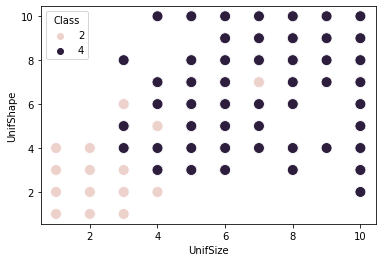

In [28]:
sns.scatterplot(x=df["UnifSize"],y=df["UnifShape"],hue=df["Class"],s=120)

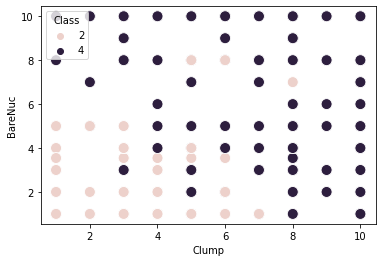

In [29]:
sns.scatterplot(x=df["Clump"],y=df["BareNuc"],hue=df["Class"],s=120)

In [30]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train) 

SVC()

In [31]:
X_train.shape

(489, 9)

In [32]:
Y_test.shape

(210,)

In [33]:
Y_test[0:5]

array([4, 4, 4, 2, 4])

In [34]:
y_pred = clf.predict(X_test)
print("\n Predicted Values:\n")
y_pred [0:5]



 Predicted Values:



array([4, 4, 2, 2, 4])

In [35]:
print("\n Actual Values:\n")
Y_test[0:5]


 Actual Values:



array([4, 4, 4, 2, 4])

<h2 id="evaluation">Evaluation</h2>


In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
classification_report(Y_test, y_pred,digits=2)

'              precision    recall  f1-score   support\n\n           2       0.98      0.96      0.97       139\n           4       0.92      0.96      0.94        71\n\n    accuracy                           0.96       210\n   macro avg       0.95      0.96      0.95       210\nweighted avg       0.96      0.96      0.96       210\n'

In [37]:
confusion_matrix(Y_test, y_pred)

array([[133,   6],
       [  3,  68]])

You can also easily use the **f1\_score** from sklearn library:


In [38]:
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred, average='weighted') 

0.9573524406627856

Let's try the jaccard index for accuracy:


In [39]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, y_pred, average='weighted')

0.9185306645065197

SVM linear kernal

In [42]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("\n Predicted Values:\n")
print(y_pred [0:5])
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print(classification_report(Y_test, y_pred,digits=2))
print(confusion_matrix(Y_test, y_pred))
from sklearn.metrics import jaccard_score
print(jaccard_score(Y_test, y_pred, average='weighted'))


 Predicted Values:

[4 4 2 2 4]
              precision    recall  f1-score   support

           2       0.96      0.96      0.96       139
           4       0.92      0.93      0.92        71

    accuracy                           0.95       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210

[[133   6]
 [  5  66]]
0.9011385109599396


Desicion trees

In [45]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("\n Predicted Values:\n")
print(y_pred [0:5])
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("classificationreport")
print(classification_report(Y_test, y_pred,digits=2))
print("confusion marix")
print(confusion_matrix(Y_test, y_pred))
from sklearn.metrics import jaccard_score
print("jaccob index")
print(jaccard_score(Y_test, y_pred, average='weighted'))


 Predicted Values:

[2 4 2 2 4]
classificationreport
              precision    recall  f1-score   support

           2       0.95      0.96      0.95       139
           4       0.91      0.90      0.91        71

    accuracy                           0.94       210
   macro avg       0.93      0.93      0.93       210
weighted avg       0.94      0.94      0.94       210

confusion marix
[[133   6]
 [  7  64]]
jaccob index
0.8839822604010471


KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
print("\n Predicted Values:\n")
print(y_pred [0:5])
from sklearn.metrics import classification_report, confusion_matrix
import itertools
print("classificationreport")
print(classification_report(Y_test, y_pred,digits=2))
print("confusion marix")
print(confusion_matrix(Y_test, y_pred))
from sklearn.metrics import jaccard_score
print("jaccob index")
print(jaccard_score(Y_test, y_pred, average='weighted'))


 Predicted Values:

[2 4 2 2 4]
classificationreport
              precision    recall  f1-score   support

           2       0.96      0.96      0.96       139
           4       0.93      0.92      0.92        71

    accuracy                           0.95       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210

confusion marix
[[134   5]
 [  6  65]]
jaccob index
0.9008516982110447
